<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Deep History
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction</b></p>


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Increasingly stringent regulations require companies to keep data online and accessible for regulatory compliance over many years. Although the most frequently accessed data is the latest or most current data, that doesn’t mean that the older information is not useful or relevant. Historical data that’s been compiled over the years gives a rich perspective of the business, such as long-term trends and cyclical patterns.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Teradata Vantage provides unmatched concurrency and performance for the world's largest and most demanding enterprises to analyze their data. Analysis and concurrency needs for older information is generally substantially less as data ages, and over time there is much more history data that accumulates than current 'hot' data, it makes sense to store it somewhere that has different performance and price characteristics: for example, an object store such as Amazon S3 or Azure Blob storage.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Keeping historical and current data in separate systems can make it a challenge to gain unique insights that are possible only by analyzing the information together. But not any longer. Now, Teradata Vantage can be used to seamlessly join together all the historical and current information across the data warehouse AND object storage, without having to change the basic data structures and queries. This makes it possible to cost-effectively answer questions that could not be previously addressed so decision makers can better plan for the future.  When running this demo in the ClearScape Analytics Experience, the Vantage Database running on Google Cloud is accessing historical data that is stored on AWS S3. </p>

<img src= "images/aws_gcp_DeepHistory.png">

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>1. Connect to Vantage</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press Enter, then use down arrow to go to next cell.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>


In [2]:
Set query_band='DEMO=DeepHistory.ipynb;' update for session;

Success: 1 rows affected

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>2. Getting Data for This Demo
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage.  You have the option of either running the demo using foreign tables to access the data without using any storage on your environment or downloading the data to local storage which may yield somewhat faster execution, but there could be considerations of available storage.  There are two statements in the following cell, and one is commented out.  You may switch which mode you choose by changing the comment string. 


In [3]:
call get_data('DEMO_SalesOffload_cloud'); ---takes about 35 seconds
---call get_data('DEMO_SalesOffload_local'); ---takes about 60 seconds

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:24.29 with 5 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optional step – if you want to see status of databases/tables created and space used.</p>


In [4]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=3 #tables=49 #views=4 You have used 14.3 MB of 27,890.4 MB available - 0.1% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 48 2 27,880.3 MB 14.1 MB"
5,DEMO_GraphAnalysis 0 1 0.0 MB 0.0 MB
6,DEMO_GraphAnalysis_db 1 0 10.1 MB 0.2 MB
7,DEMO_SalesOffload 0 1 0.0 MB 0.0 MB


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>3. Querying the Data</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here is our current sales data. Let's grab some sample rows, we can see in this example we have customer, store, basket and discount information.</p>

In [5]:
SELECT TOP 5 * 
FROM DEMO_SalesOffload.sales_fact;

,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,2019-08-15,2753,3,3127533,7,4,0.0940131
2,2019-11-09,2027,7,31020277,91,2,0.0107027
3,2019-11-17,2027,7,30220277,20,9,0.107858
4,2019-08-20,3087,7,2630877,37,9,0.157746
5,2019-08-16,3089,9,3030899,6,8,0.121561


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Aggregating our current sales data for each date.</p>

In [6]:
SELECT sales_date, sum(sales_quantity) as total 
FROM DEMO_SalesOffload.sales_fact
GROUP BY sales_date
ORDER BY sales_date ASC

,sales_date,total
1,2019-01-01,62504
2,2019-01-02,64508
3,2019-01-03,62652
4,2019-01-04,60468
5,2019-01-05,63020
6,2019-01-06,64724
7,2019-01-07,63704
8,2019-01-08,64416
9,2019-01-09,64436
10,2019-01-10,61864


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's view our current sales data for each date by plotting it in a chart.</p>

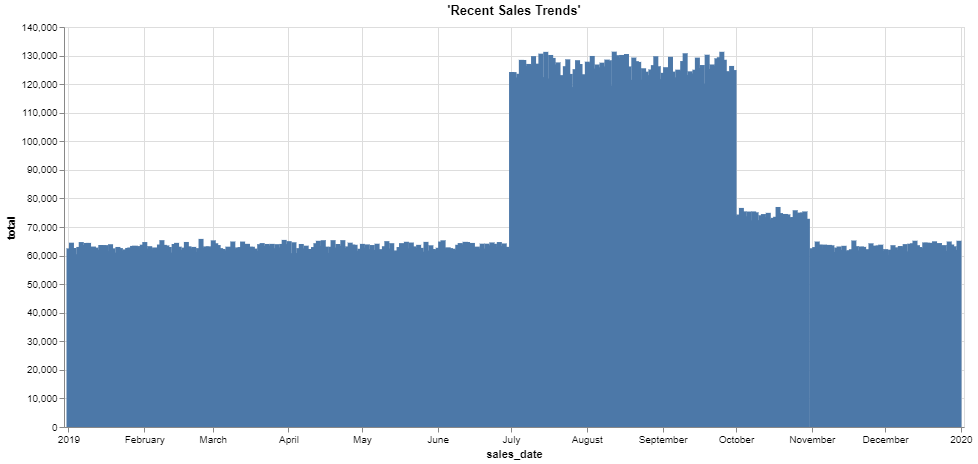

In [7]:
%chart sales_date, total, title='Recent Sales Trends', width=900, height=400

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From the above chart it can be seen that the sales in the month of July, August and September are high. This is a sample data used to showcase this usecase and is not actual sales data.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>4. Explore the offloaded historical data </b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>As you have seen we only have 1 year of sales data in our data warehouse as this is by far the most queried, but for compliance many companies need to keep up to 10 years of historical data. The older data has been exported from Vantage on a monthly basis and loaded into Amazon S3 for long term storage. With Teradata Vantage we can seamlessly access this offloaded data and join with the rest of the data to get insights over long term trends and handle audit requests with ease. This includes using existing queries and reports that would otherwise need to be re-written!</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We know the bucket where the offloaded sales data is located, so let's take a look at some of the data that is there - using the READ_NOS function we can get the list of files and their sizes.</p>

In [8]:
SELECT location(char(255)), ObjectLength 
FROM read_nos (
USING 
 LOCATION  ('/s3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/') ---('/s3/s3.amazonaws.com/trial-datasets/SalesOffload')
 RETURNTYPE ('NOSREAD_KEYS')
) as d 
ORDER BY 1

,Location,ObjectLength
1,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet,12484548
2,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2011/2011/object_33_0_1.parquet,16564887
3,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2011/2011/object_33_0_2.parquet,1242222
4,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2012/2012/object_33_2_1.parquet,16561265
5,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2012/2012/object_33_2_2.parquet,15091468
6,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2013/2013/object_33_0_1.parquet,16486474
7,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2013/2013/object_33_0_2.parquet,16585852
8,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2013/2013/object_33_0_3.parquet,2897528
9,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2014/2014/object_33_3_1.parquet,16418418
10,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2014/2014/object_33_3_2.parquet,16464532


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>There are total 28 files having sales data stored in the Object Store.<br>While designing cloud storage there is a compromise between selectivity and the overhead of requesting each file when processing the entire table. Breaking data up into multiple files allows multiple files to be processed in parallel which improves performance reduces the impact of latency for cloud storage. It also allows reading a subset of the data. On the other hand, if each unit of parallelism needs to open lots of files for a full table scan, then that will reduce the performance due to the overhead of opening multiple files for each unit of parallelism. Hence file/folder structure will depend on the how we will access the data, if the queries are using all the years' worth of data, then there is no need to divide the data on monthly basis.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's take a look at one of the files to get a better understanding of the file format:</p>

In [9]:
SELECT * FROM READ_NOS (
      USING
      LOCATION  ('/s3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet')
      RETURNTYPE ('NOSREAD_PARQUET_SCHEMA')
      FULLSCAN ('TRUE')
      )
AS d

,ColPosition,Name,TdatDataType,PhysicalType,LogicalType,Precision,Scale,MinLength,MaxLength,NullFound,FileType,Location
1,1,TheYear,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
2,2,TheMonth,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
3,3,sales_date,DATE,INT32,DATE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
4,4,customer_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
5,5,store_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
6,6,basket_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
7,7,product_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
8,8,sales_quantity,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet
9,9,discount_amount,FLOAT,DOUBLE,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2010/2010/object_33_0_1.parquet


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>5. Create a simple abstraction layer for easy access</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Create a foreign table and a view in Vantage to allow business analysts and other users to easily access the offloaded historical data:</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Note, you will need to list all the columns in the foreign table definition </p>

In [10]:
CREATE FOREIGN TABLE sales_fact_offload
       (
Location VARCHAR(2048) CHARACTER SET UNICODE CASESPECIFIC,
TheYear INTEGER,
TheMonth INTEGER,
sales_date DATE FORMAT 'YY/MM/DD',
customer_id INTEGER,
store_id INTEGER,
basket_id INTEGER,
product_id INTEGER,
sales_quantity INTEGER,
discount_amount FLOAT FORMAT '-ZZZ9.99'
)
USING
       (
LOCATION  ('/s3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/')
STOREDAS  ('PARQUET')
       )
NO PRIMARY INDEX
PARTITION BY COLUMN

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's take a look at some of the rows that are in the offloaded files. The table is with the location of the file and then the columns as defined in the table created above.</p>

In [11]:
SELECT TOP 5 *
FROM sales_fact_offload

,Location,TheYear,TheMonth,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2011/2011/object_33_0_1.parquet,2011,8,2011-08-10,2517,7,3625177,60,3,0.164221
2,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2012/2012/object_33_2_1.parquet,2012,7,2012-07-27,3072,2,5030722,93,2,0.103847
3,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2012/2012/object_33_2_1.parquet,2012,7,2012-07-02,3072,2,7530722,26,5,0.0665043
4,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2018/2018/object_33_0_7.parquet,2018,5,2018-05-11,4182,2,12741822,49,10,0.150882
5,/S3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/2018/2018/object_33_0_7.parquet,2018,5,2018-05-30,4182,2,10841822,35,7,0.0672583


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>How much data do we have out there? </p>

In [12]:
SELECT COUNT(*)
FROM sales_fact_offload

,Count(*)
1,37592550


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Ok, we are close! We want the data to look like a native table. So, let's put a view on top to split it out into columns.</p>

In [13]:
REPLACE VIEW sales_fact_offload_v as (  
SELECT 
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload)

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now we can see that after creating the view with only the required columns we are able to get the required data , but the data is pulled at query runtime directly from the object store. We now have a seamless analytic experience by supporting the correlation of object store-based data sets with structured data sets in Teradata relational tables using existing SQL skills and workflows. </p>

In [14]:
SELECT TOP 5 *
FROM sales_fact_offload_v

,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,2011-08-10,2517,7,3625177,60,3,0.164221
2,2018-05-11,4182,2,12741822,49,10,0.150882
3,2018-05-30,4182,2,10841822,35,7,0.0672583
4,2012-07-27,3072,2,5030722,93,2,0.103847
5,2012-07-02,3072,2,7530722,26,5,0.0665043


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>That looks nice! Now our users can access all the historical data we have in the object store.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You can do everything in a view over a foreign table that you would do with a standard database view. This includes returning only a subset of the underlying table columns, as well as adding a WHERE clause in the view to limit what rows are made available using the view.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Often, we want to be able to look at just a portion of this vast amount of data at a time, which is why we have stored it by year and month. Let's re-define the foreign table to allow us to pre-filter the data when reading it.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>6. Optimize the foreign table and view for efficient access</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have a lot of data in S3! Let's optimize the foreign table so that we minimize the data we have to read when querying the object store. Designing an object store bucket and path structure is an important first step when creating an object store. It requires knowledge of the business needs, the expected patterns in accessing the data, an understanding of the data, and a sensitivity to the trade-offs. In our case we will often know the approximate date we are looking at, so will use this to our advantage.</p>

In [15]:
DROP TABLE sales_fact_offload

Success: 30 rows affected

In [16]:
CREATE FOREIGN TABLE sales_fact_offload
       (
Location VARCHAR(2048) CHARACTER SET UNICODE CASESPECIFIC,
TheYear INTEGER,
TheMonth INTEGER,
sales_date DATE FORMAT 'YY/MM/DD',
customer_id INTEGER,
store_id INTEGER,
basket_id INTEGER,
product_id INTEGER,
sales_quantity INTEGER,
discount_amount FLOAT FORMAT '-ZZZ9.99'
)
USING
       (
LOCATION  ('/s3/s3.amazonaws.com/clearscape-analytics-datasets/sales_fact_offload/')
PATHPATTERN ('$dir1/$year/$y1')
STOREDAS  ('PARQUET')
       )
NO PRIMARY INDEX
PARTITION BY COLUMN

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have re-defined our foreign table to include a <b>PATHPATTERN</b> clause. When looking at historical data by date, this allows us to read only the files we need!</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now let's re-create our user-friendly view that allows for this path filtering...</p>

In [17]:
REPLACE VIEW sales_fact_offload_v as (  
SELECT 
    CAST($path.$year AS CHAR(4)) sales_year,
    Cast(Extract(month from Sales_date) as CHAR(2)) sales_month,
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload)

Success: 8 rows affected

In [18]:
SELECT TOP 5 *
FROM sales_fact_offload_v
WHERE sales_year = '2010'


,sales_year,sales_month,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,2010,5,2010-05-10,1314,4,12813144,80,1,0.166567
2,2010,7,2010-07-13,2252,2,6422522,47,3,0.114701
3,2010,3,2010-03-31,2008,8,16820088,15,4,0.112236
4,2010,6,2010-06-02,1314,4,10513144,87,2,0.103937
5,2010,3,2010-03-08,2517,7,19125177,67,4,0.131901


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>This is great for use cases where we know the date. Suppose we need to see what a customer bought many years ago. Or maybe we want to report on historical store sales. The business analyst can easily query this with no IT intervention, no going to backups or other hard to reach data silos!</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's take a look at what store 6 did for sales back in 2012:</p>

In [19]:
SELECT store_id, SUM(sales_quantity)
FROM sales_fact_offload_v
WHERE store_id = 6
AND sales_year = '2012'
GROUP BY 1

,store_id,sales_quantity
1,6,503141


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's join the historical data with the current data so we can see the full picture:</p>

In [20]:
REPLACE VIEW sales_fact_all as (
SELECT 
    cast(Extract(year from Sales_Date) as CHAR(4)) sales_year,
    cast(Extract(month from Sales_date) as CHAR(2)) sales_month,
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
    FROM DEMO_SalesOffload.sales_fact
    UNION ALL
SELECT
    sales_year,
    sales_month,
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload_v)

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Final thing we will do is re-run our sales over time report, code is unchanged from the one above, we are now able to analyze all the sales data and not just the most recent year. Below we are trying to check sales for Store "8" over time.</p>

In [21]:
SELECT sales_date, sum(sales_quantity) as total 
FROM sales_fact_all
where store_id = 8
GROUP BY sales_date
ORDER BY sales_date ASC

,sales_date,total
1,2010-01-01,358
2,2010-01-02,482
3,2010-01-03,502
4,2010-01-04,362
5,2010-01-05,217
6,2010-01-06,426
7,2010-01-07,448
8,2010-01-08,356
9,2010-01-09,515
10,2010-01-10,229


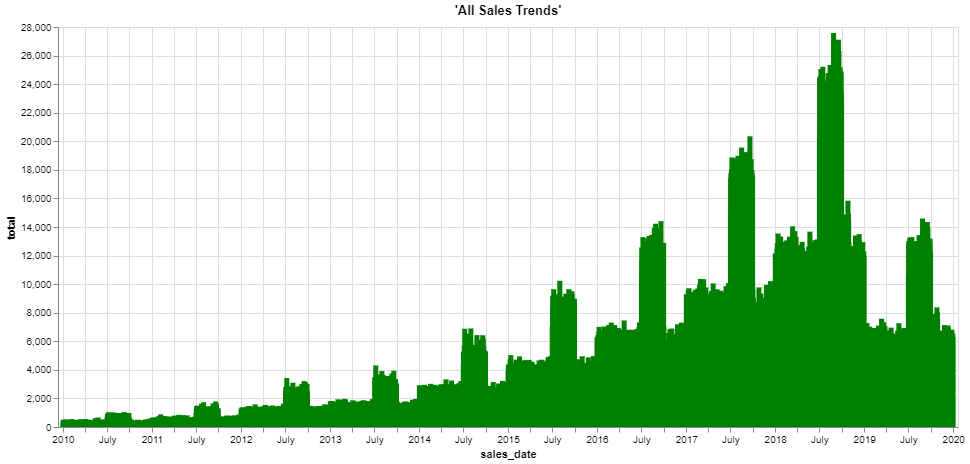

In [22]:
%chart sales_date, total, title='All Sales Trends', width=900, height=400, color=green

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now we see that sales in 2019 were less as compared to 2017 and 2018. We will need to do further digging to see what happened. But thanks to Teradata Vantage we can cost-effectively analyze all our data by offloading the colder less required data to object storage for safe keeping.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>7. Cleanup </b></p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Work Tables</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Cleanup work tables to prevent errors next time.</p>

In [23]:
DROP VIEW sales_fact_all

Success: 15 rows affected

In [24]:
DROP VIEW sales_fact_offload_v

Success: 15 rows affected

In [25]:
DROP TABLE sales_fact_offload

Success: 30 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b>Databases and Tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The following code will clean up tables and databases created above.</p>

In [26]:
call remove_data('DEMO_SalesOffload');-- takes about 10 seconds, optional if you want to use the data later

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_SalesOffload. That ran for 0:00:02.94


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>8. Dataset</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
The <b>sales_fact</b> dataset has approximately 43 million rows of sample sales data:

- `sales_date`: date the order was processed
- `customer_id`: customer identifier
- `store_id`: store identifier where the order was taken
- `basket_id`: grouping or order number
- `product_id`: identifier of the product
- `sales_quantity`: quantity of the product sold
- `discount_amount`: how much of a discount was given on this line item </p>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2023. All Rights Reserved
        </div>
    </div>
</footer>